In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt

N = 1000
NUM_RUNS = [1, 2, 3]
CONTAINS = [True, False]
PAT_LENS = [2, 10, 20, 50, 100, 500, 1000]
TEXT_LENS = [1000, 10000, 50000, 100000]


def get_mean_results(strategy: str, patInText: bool, textLen: int, pat_len: int):
    results = []
    for br_filename in glob.glob(
            f'{strategy}patInTxt={patInText}txtLen={textLen}patLen={pat_len}n={N}?.br'):
        with open(br_filename, 'r') as file:
            temp = [round(float(line.replace('\n', '')), 2) for line in file.readlines()[1:]]
            results += temp

    return np.mean(results)
'''
for pat_len in PAT_LENS:
    print(get_mean_results('naive', True, 100000, pat_len))
'''

"\nfor pat_len in PAT_LENS:\n    print(get_mean_results('naive', True, 100000, pat_len))\n"

In [4]:
def print_graph_for_strategy(strategy: str, patInText):
    fig = plt.figure()
    fig.set_size_inches(27, 15.5, forward=True)

    ax = fig.add_subplot(111, projection='3d')

    x = PAT_LENS
    y = TEXT_LENS

    X, Y = np.meshgrid(x, y)
    zs =[get_mean_results(strategy, patInText, textLen, patLen) for textLen in y for patLen in x]
    zs = np.array(zs)


    Z = zs.reshape(X.shape)
    ax.plot_surface(X, Y, Z)
    ax.set_yticks(TEXT_LENS)
    ax.set_xticks(PAT_LENS)
    plt.gca().invert_xaxis()

    ax.set_xlabel('#Words in Pattern')
    ax.set_ylabel('#Words in Text')
    ax.set_zlabel('Ms')

    return plt

naive


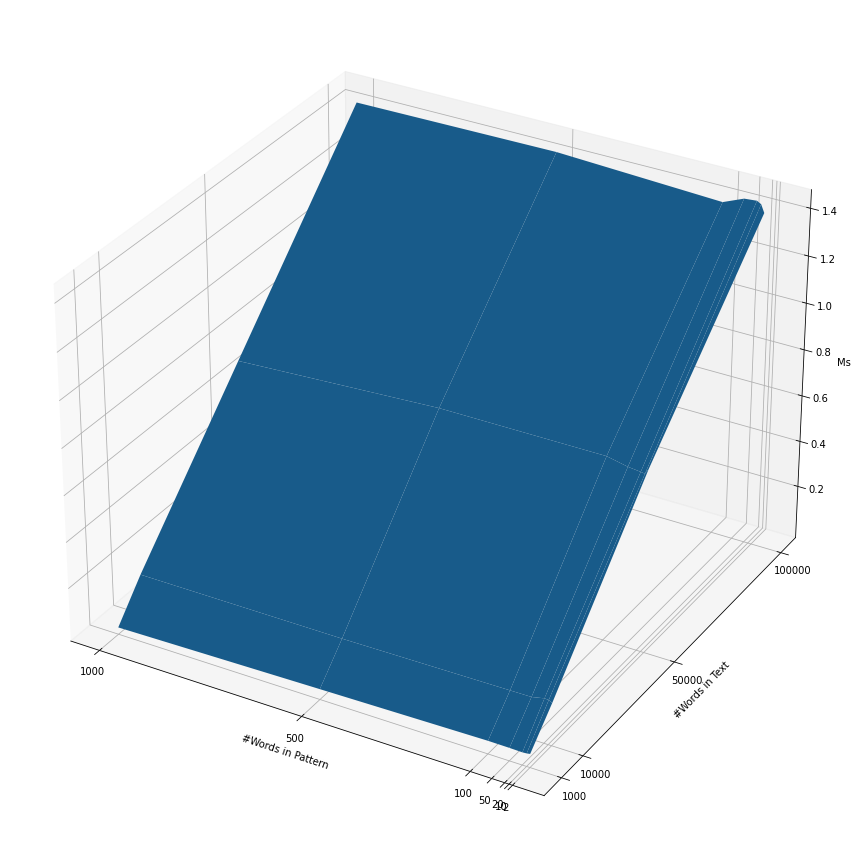

naive03


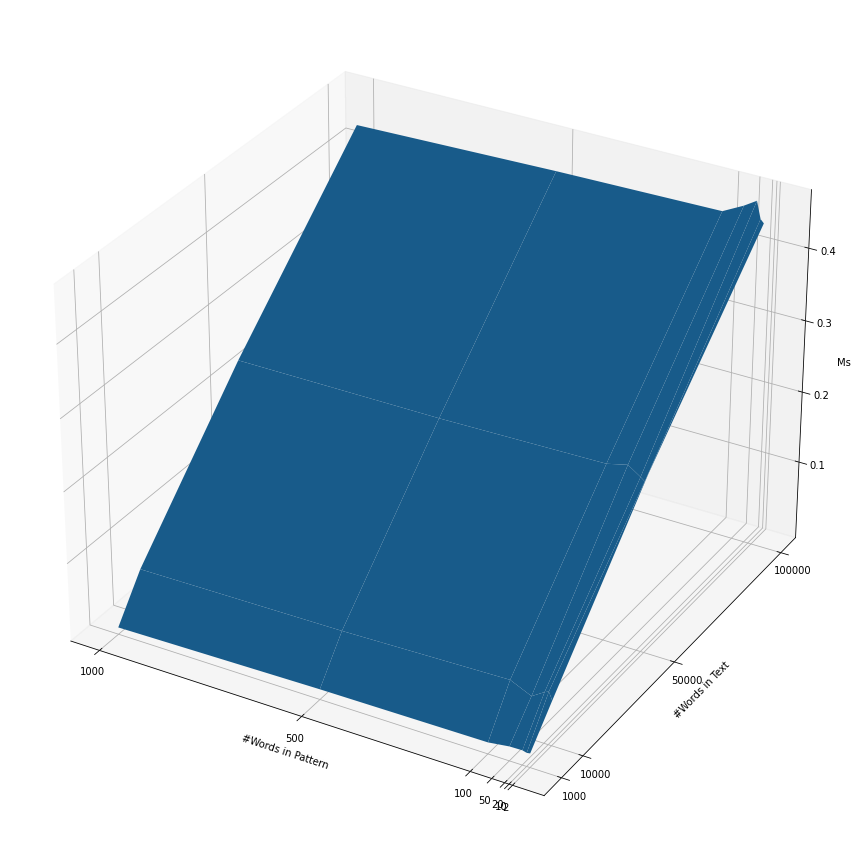

naive03Parallel


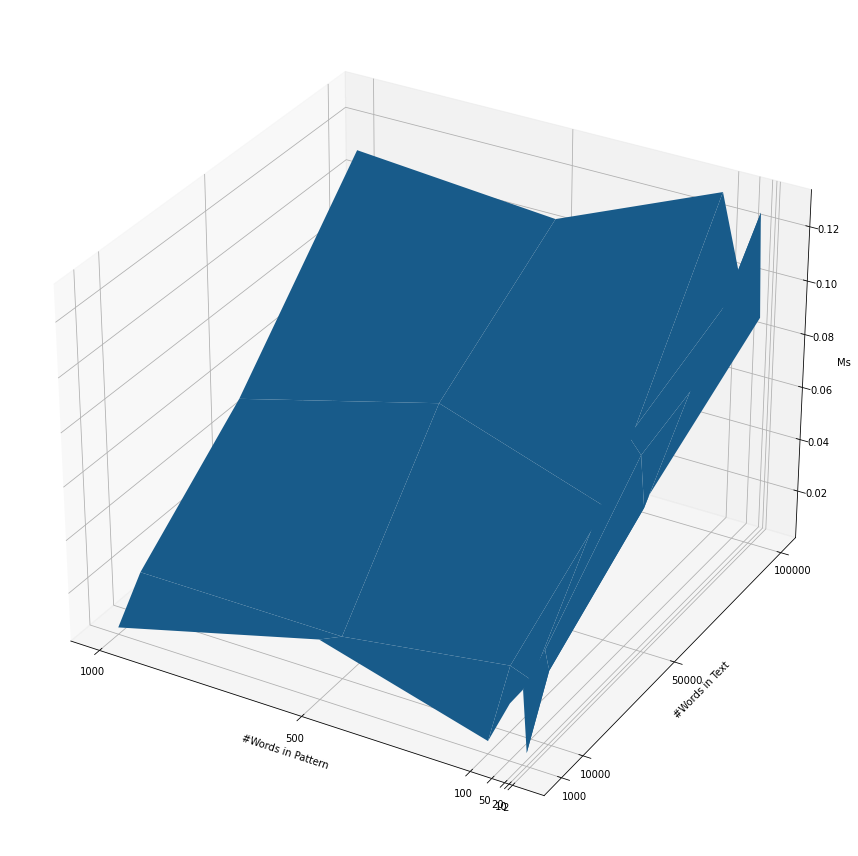

kmp


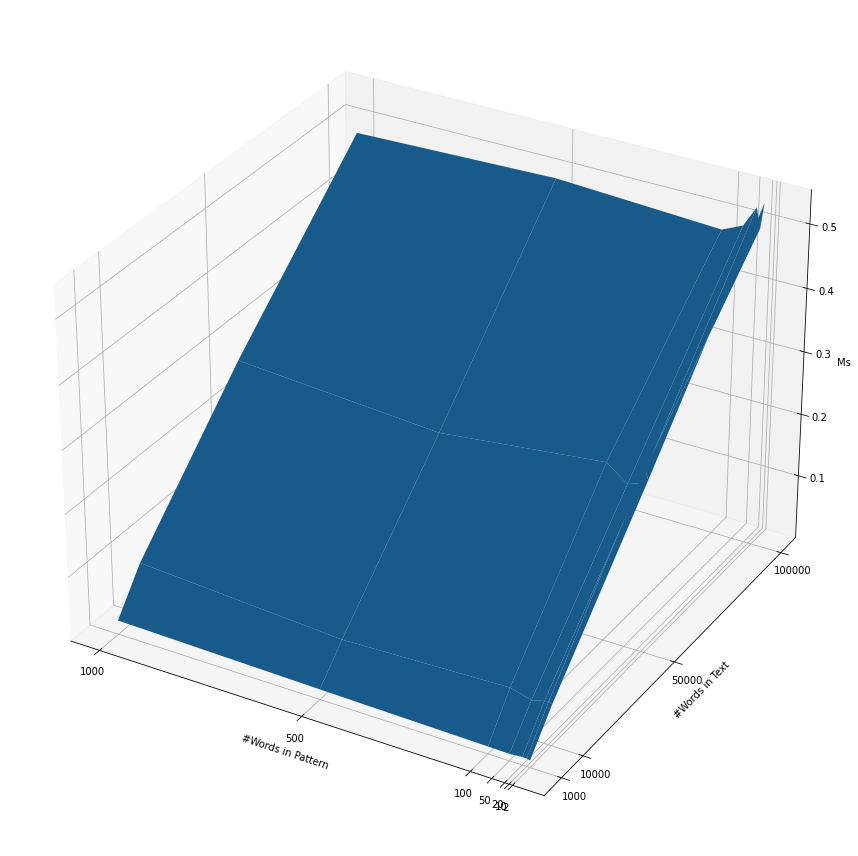

kmpParallel


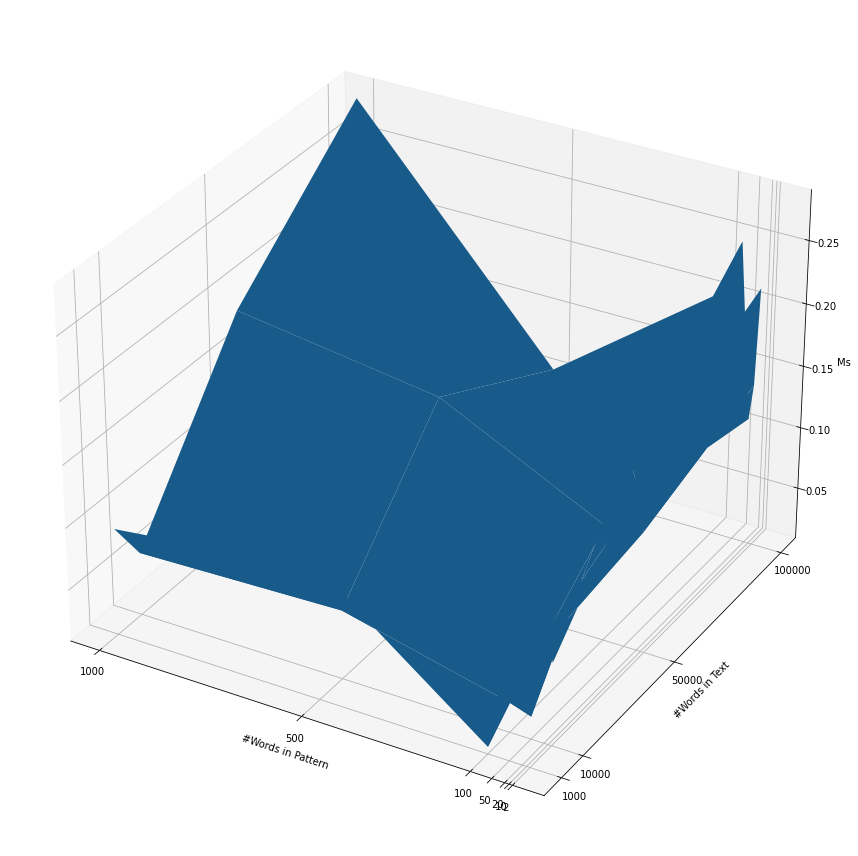

bm


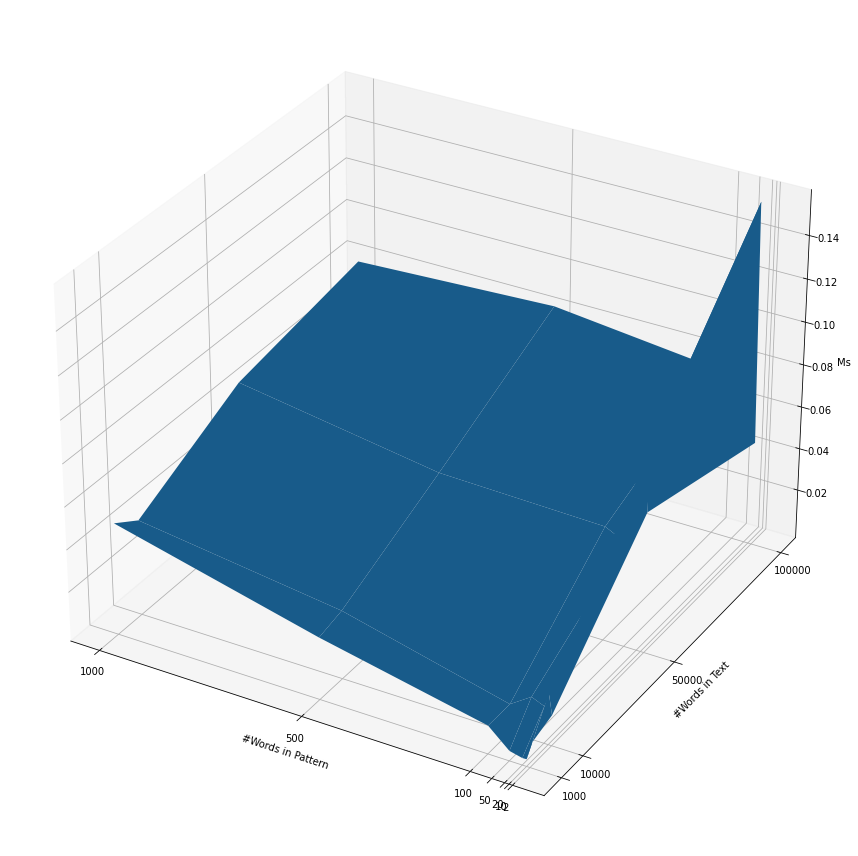

bmParallel


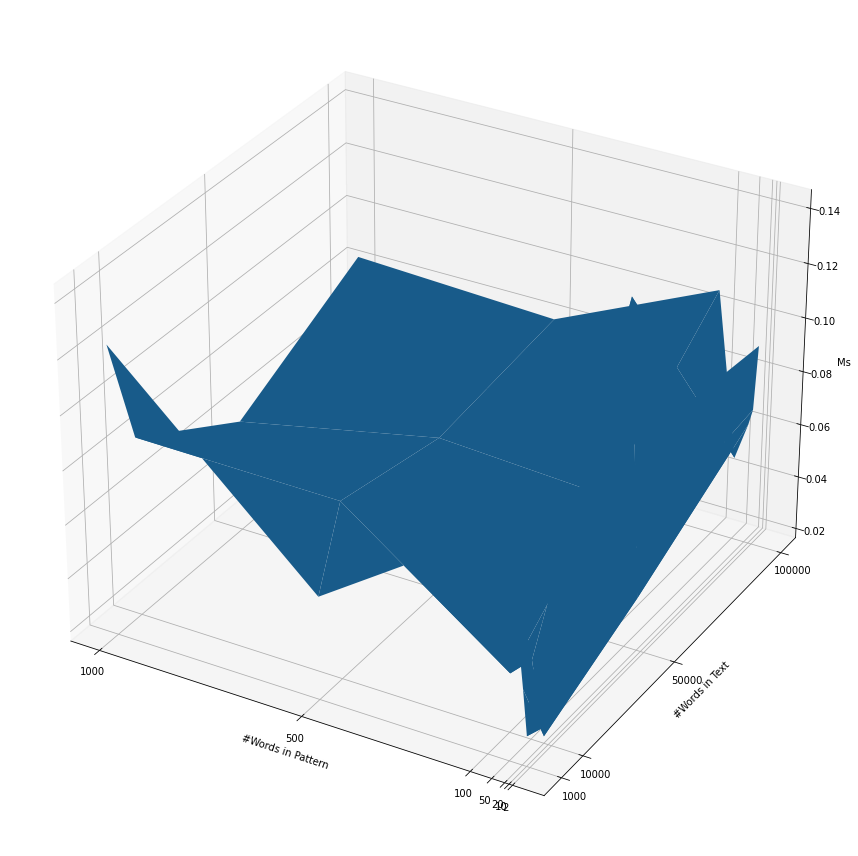

In [5]:
for approach in ['naive', 'naive03', 'naive03Parallel', 'kmp', 'kmpParallel', 'bm', 'bmParallel']:
    print(approach)
    plt = print_graph_for_strategy(approach, True)

    plt.savefig(f'{approach}.png')
    plt.show()

naive
naive03
naive03Parallel
kmp
kmpParallel
bm
bmParallel


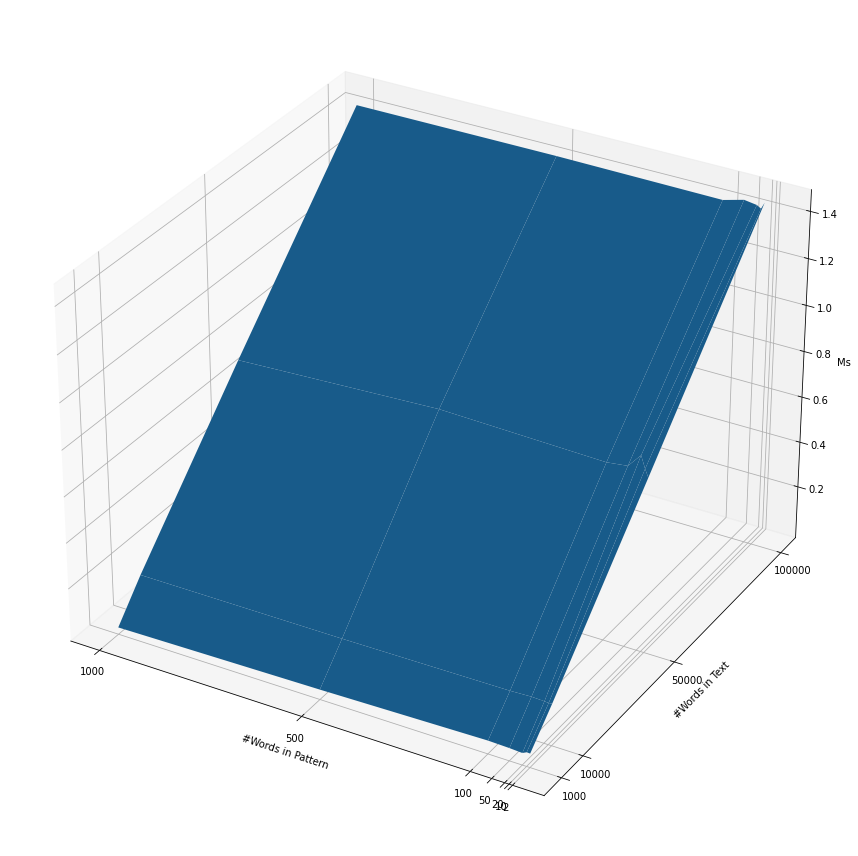

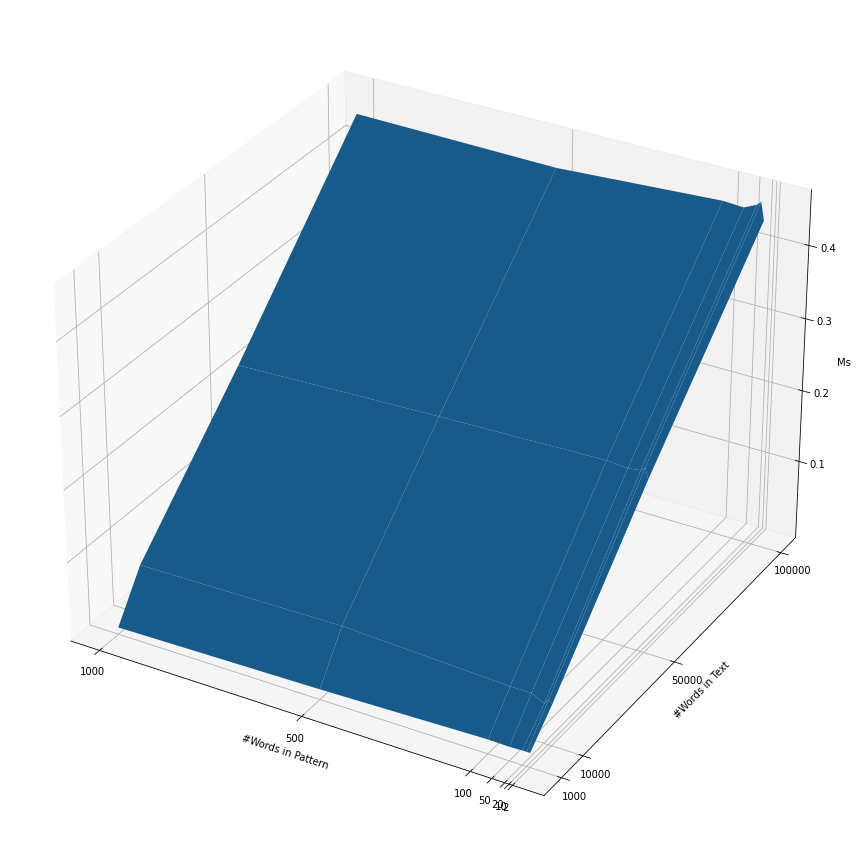

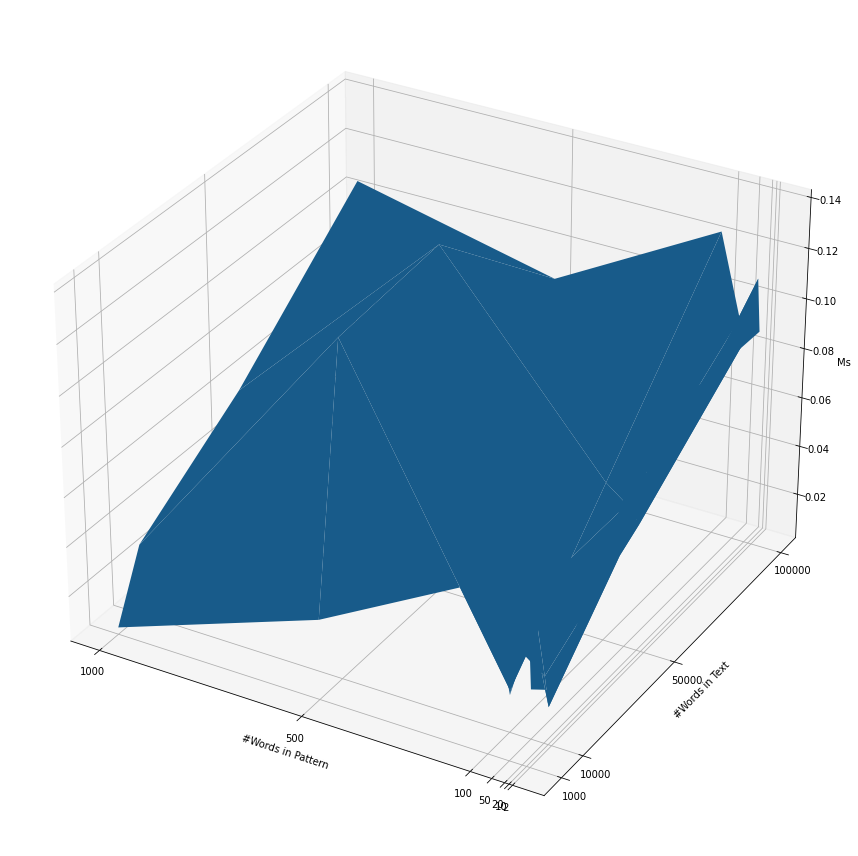

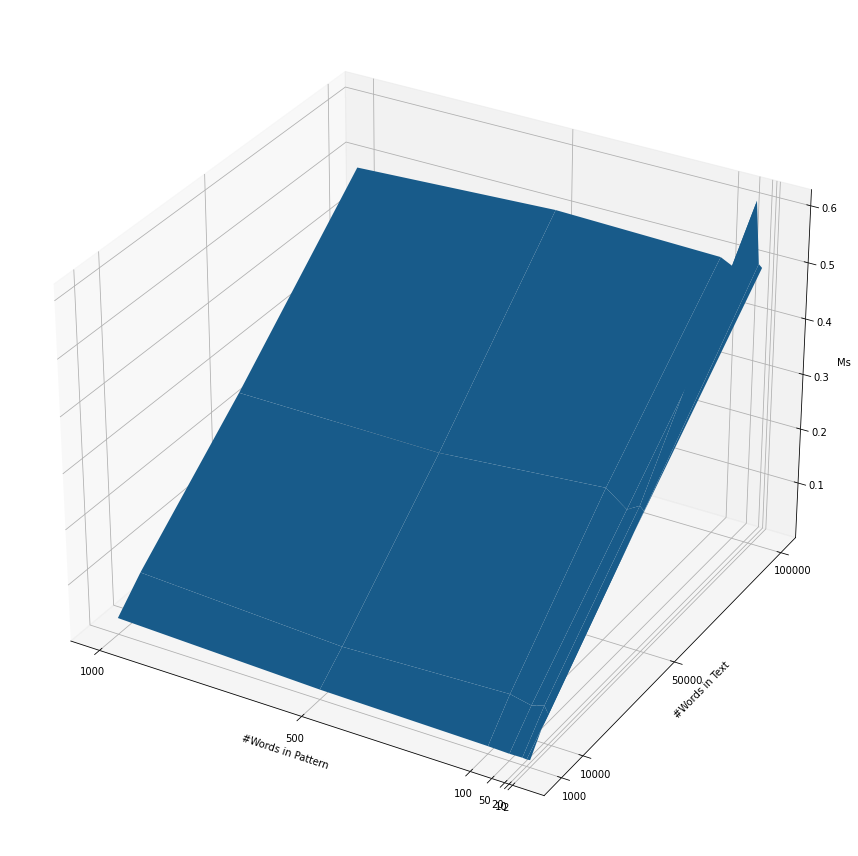

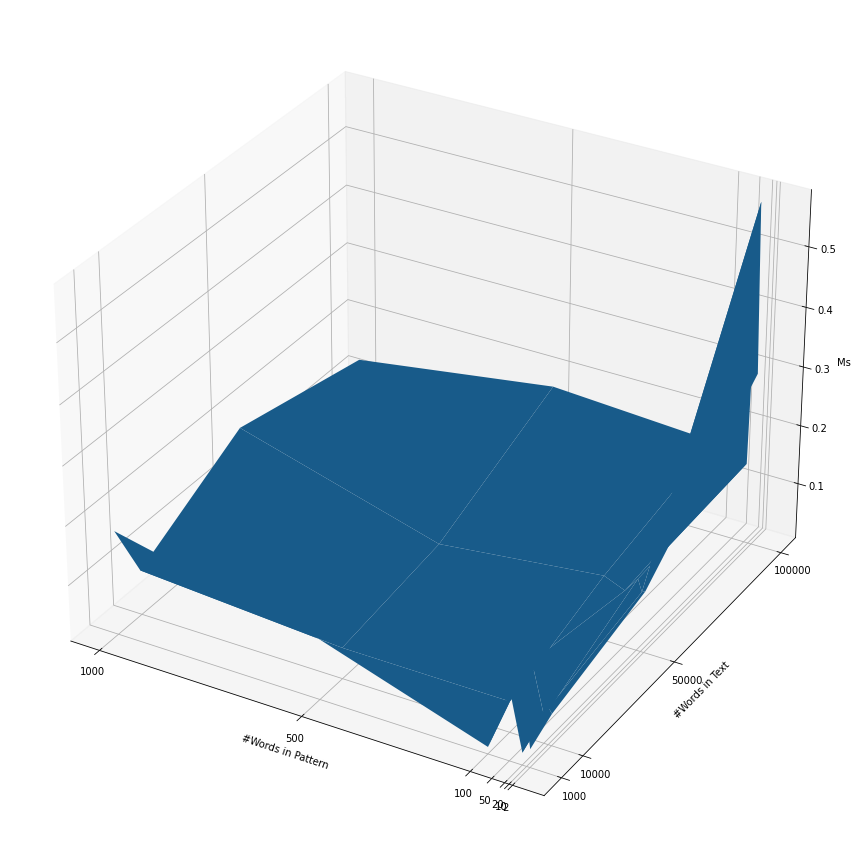

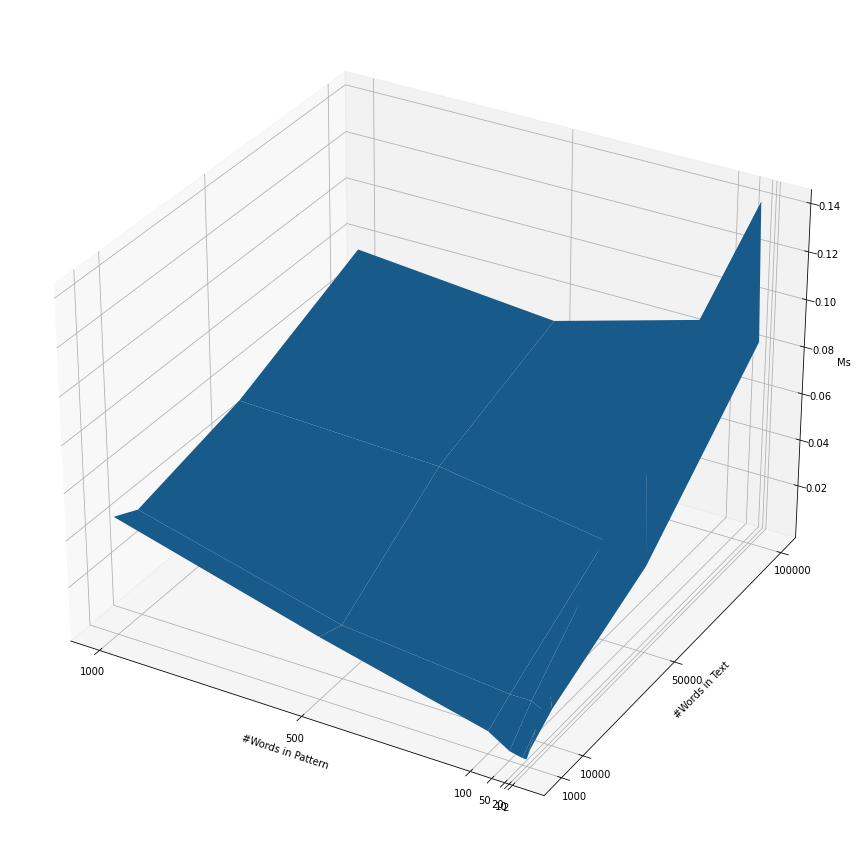

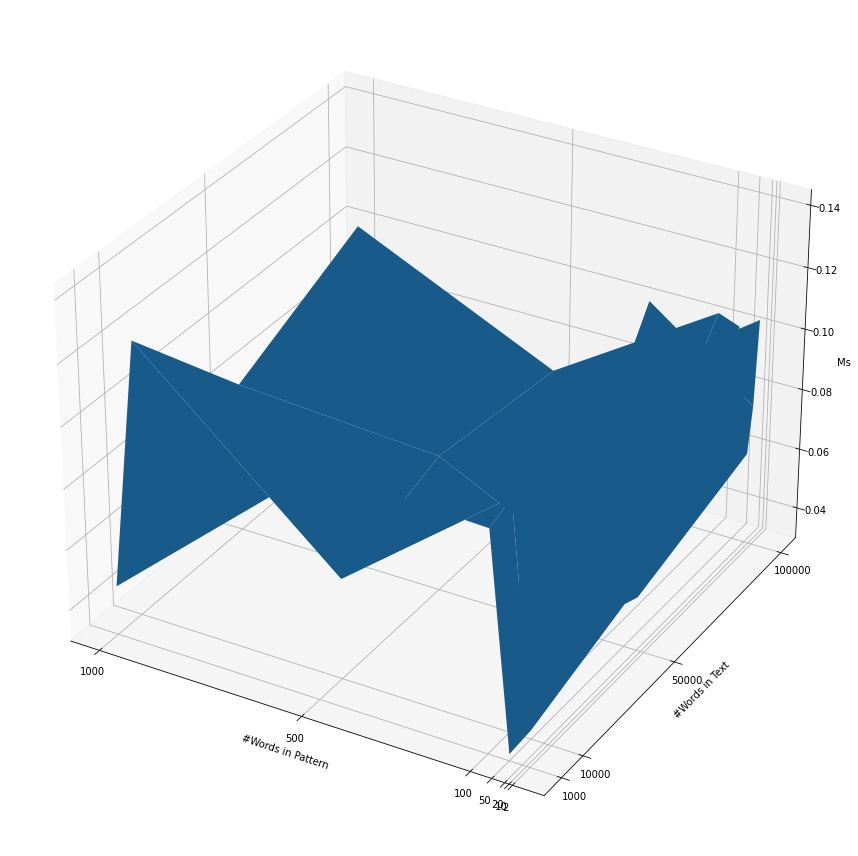

In [26]:
for approach in ['naive', 'naive03', 'naive03Parallel', 'kmp', 'kmpParallel', 'bm', 'bmParallel']:
    print(approach)
    plt = print_graph_for_strategy(approach, False)
    plt.show()